# Get Data From WandB

In [1]:
import wandb
import matplotlib.pyplot as plt
import pandas as pd
import os

api = wandb.Api()
runs = api.runs("aihwkit_v1b_test")

# Sort Data

In [2]:
name_list, group_list, job_list = [], [], []
for run in runs:
    name_list.append(run.name)
    group_list.append(run.group)
    job_list.append(run.job_type)

# baselines
Floating_Point_Baseline_run_id = []
noise_free_run_id = []
# dtod noise
w_max_and_w_min_30_run_id = []
Ndiscmax_dtod_30_unbonded_run_id = []
Ndiscmin_dtod_30_unbonded_run_id = []
ldet_dtod_30_unbonded_run_id = []
rdet_dtod_30_unbonded_run_id = []
# ctoc noise
# Ndiscmax
Ndiscmax_ctoc_30_run_id = []
Ndiscmax_ctoc_90_run_id = []
# Ndiscmin
Ndiscmin_ctoc_30_run_id = []
Ndiscmin_ctoc_10_run_id = []
# ldet
ldet_ctoc_direct_30_run_id = []
ldet_ctoc_slope_30_run_id = []
# rdet
rdet_ctoc_direct_30_run_id = []
rdet_ctoc_slope_30_run_id = []
rdet_ctoc_direct_10_run_id = []
rdet_ctoc_slope_10_run_id = []
# realistic_mixed
realistic_mixed_run_id = []

for i in range(len(job_list)):
    if job_list[i] == 'Floating Point Baseline':
        Floating_Point_Baseline_run_id.append(i)
    if job_list[i] == 'noise_free':
        noise_free_run_id.append(i)

    if job_list[i] == 'w_max_and_w_min_30%':
        w_max_and_w_min_30_run_id.append(i)
    if job_list[i] == 'Ndiscmax_dtod_30%_unbonded':
        Ndiscmax_dtod_30_unbonded_run_id.append(i)
    if job_list[i] == 'Ndiscmin_dtod_30%_unbonded':
        Ndiscmin_dtod_30_unbonded_run_id.append(i)
    if job_list[i] == 'ldet_dtod_30%_unbonded':
        ldet_dtod_30_unbonded_run_id.append(i)
    if job_list[i] == 'rdet_dtod_30%_unbonded':
        rdet_dtod_30_unbonded_run_id.append(i)

    if job_list[i] == 'Ndiscmax_ctoc_30%':
        Ndiscmax_ctoc_30_run_id.append(i)
    if job_list[i] == 'Ndiscmax_ctoc_90%':
        Ndiscmax_ctoc_90_run_id.append(i)

    if job_list[i] == 'Ndiscmin_ctoc_30%':
        Ndiscmin_ctoc_30_run_id.append(i)
    if job_list[i] == 'Ndiscmin_ctoc_10%':
        Ndiscmin_ctoc_10_run_id.append(i)

    if job_list[i] == 'ldet_ctoc_direct_30%':
        ldet_ctoc_direct_30_run_id.append(i)
    if job_list[i] == 'ldet_ctoc_slope_30%':
        ldet_ctoc_slope_30_run_id.append(i)

    if job_list[i] == 'rdet_ctoc_direct_30%':
        rdet_ctoc_direct_30_run_id.append(i)
    if job_list[i] == 'rdet_ctoc_slope_30%':
        rdet_ctoc_slope_30_run_id.append(i)
    if job_list[i] == 'rdet_ctoc_direct_10%':
        rdet_ctoc_direct_10_run_id.append(i)
    if job_list[i] == 'rdet_ctoc_slope_10%':
        rdet_ctoc_slope_10_run_id.append(i)

    if job_list[i] == 'realistic_mixed':
        realistic_mixed_run_id.append(i)
        

# Define plot function

In [56]:
def plot_data_loss(data, plot_run_ids, title, legend_loc = 'upper right'):
    if not os.path.exists('figures/'):
        os.makedirs('figures/')

    group_count = len(plot_run_ids)
    fig, ax1 = plt.subplots()
    ax1.set_title(title)
    ax1.set_xlabel('training step')
    ax1.set_ylabel('loss')
    for group_number in range(group_count):
        job = data[plot_run_ids[group_number][0]].job_type
        loss = []
        for run_number in plot_run_ids[group_number]:
            df = pd.DataFrame(data[run_number].history())
            df = df.drop(['Model Accuracy'], axis=1)
            df = df.drop(df.tail(1).index)
            loss.append(df.loss.tolist())
        loss = pd.DataFrame(loss)
        loss_mean = loss.mean().tolist()
        loss_std = loss.std().tolist()
        ax1.errorbar([*range(1, len(loss_mean)+1, 1)], loss_mean, yerr=loss_std)
        ax1.scatter([*range(1, len(loss_mean)+1, 1)], loss_mean, label=job)

    ax1.legend(loc = legend_loc)
    plt.savefig('figures/%s_loss.png'%title)
    plt.savefig('figures/%s_loss.pdf'%title) 
    
def plot_data_accuracy_base(data, plot_run_ids, title, job_names = None):
    if not os.path.exists('figures/'):
        os.makedirs('figures/')

    group_count = len(plot_run_ids)
    names, accuracy_mean, accuracy_std = [], [], []
    for group_number in range(group_count):
        job = data[plot_run_ids[group_number][0]].job_type
        names.append(job)
        Accuracy = []
        for run_number in plot_run_ids[group_number]:
            df = pd.DataFrame(data[run_number].history())
            Accuracy.append(df.iloc[-1,-1])
        Accuracy = pd.DataFrame(Accuracy)
        accuracy_mean.append(Accuracy.mean().iloc[0])
        accuracy_std.append(Accuracy.std().iloc[0])
    
    fig, ax2 = plt.subplots()
    x_pos = [*range(0, group_count, 1)]
    ax2.bar(x_pos, accuracy_mean, yerr=accuracy_std, color = plt.rcParams['axes.prop_cycle'].by_key()['color'])
    for i in range(len(accuracy_mean)):
        ac = accuracy_mean[i]*100
        if ac >= 60:
            ac = "%.3f" %ac
            plt.text(x_pos[i], accuracy_mean[i]+0.005, '%s%%'%ac, horizontalalignment='center')
        else:
            ac = "%.3f" %ac
            plt.text(x_pos[i], 0.6+0.005, '%s%%'%ac, horizontalalignment='center')
    ax2.set_xticks(x_pos)
    if job_names is None:
        ax2.set_xticklabels(names)
    else:
        ax2.set_xticklabels(job_names)
    plt.ylim(0.6, 1.0)
    ax2.set_yticks([0.6,0.7,0.8,0.9,1.0])
    ax2.set_yticklabels(['60%','70%','80%','90%','100%'])
    ax2.set_title(title)
    ax2.set_ylabel('Test Accuracy')
    
def plot_data_accuracy(data, plot_run_ids, title, job_names = None):
    plot_data_accuracy_base(data, plot_run_ids, title, job_names)
    plt.savefig('figures/%s_accuracy.png'%title)
    plt.savefig('figures/%s_accuracy.pdf'%title) 
    
def calculate_baseline_accuracy(data, Floating_Point_Baseline_run_id, noise_free_run_id):
    Floating_Point_Accuracy = []
    for run_number in Floating_Point_Baseline_run_id:
        df = pd.DataFrame(data[run_number].history())
        Floating_Point_Accuracy.append(df.iloc[-1,-1])
    Floating_Point_Accuracy = pd.DataFrame(Floating_Point_Accuracy)
    Floating_Point_Accuracy = Floating_Point_Accuracy.mean().iloc[0]

    noise_free_Accuracy = []
    for run_number in noise_free_run_id:
        df = pd.DataFrame(data[run_number].history())
        noise_free_Accuracy.append(df.iloc[-1,-1])
    noise_free_Accuracy = pd.DataFrame(noise_free_Accuracy)
    noise_free_Accuracy = noise_free_Accuracy.mean().iloc[0]

    return Floating_Point_Accuracy, noise_free_Accuracy
    
def plot_data_accuracy_with_bar(data, plot_run_ids, title, Floating_Point_Accuracy, noise_free_Accuracy, job_names = None):
    plot_data_accuracy_base(data, plot_run_ids, title, job_names)
    plt.axhline(y=Floating_Point_Accuracy, color='r', linestyle='-')
    plt.axhline(y=noise_free_Accuracy, color='b', linestyle='-')
    plt.savefig('figures/%s_accuracy.png'%title)
    plt.savefig('figures/%s_accuracy.pdf'%title) 
    
def plot_data_accuracy_with_bar_vertical(data, plot_run_ids, title, Floating_Point_Accuracy, noise_free_Accuracy):
    plot_data_accuracy_base(data, plot_run_ids, title)
    plt.axhline(y=Floating_Point_Accuracy, color='r', linestyle='-')
    plt.axhline(y=noise_free_Accuracy, color='b', linestyle='-')
    plt.savefig('figures/%s_accuracy.png'%title)
    plt.savefig('figures/%s_accuracy.pdf'%title) 

# Plots

## Baselines

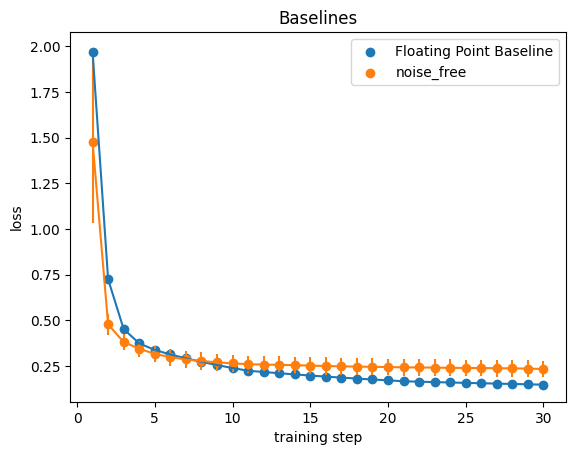

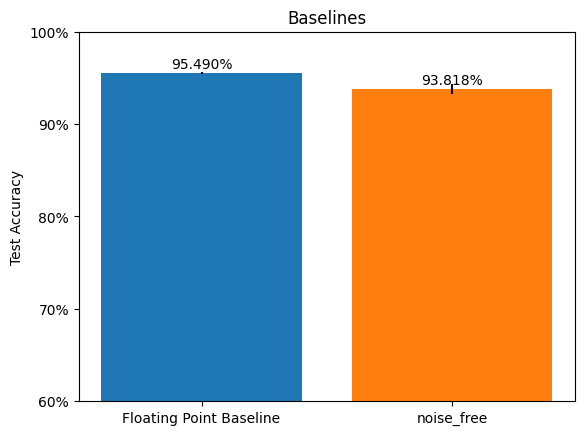

In [36]:
run_ids = []
run_ids.append(Floating_Point_Baseline_run_id)
run_ids.append(noise_free_run_id)
plot_data_loss(data = runs, plot_run_ids = run_ids, title = 'Baselines')
plot_data_accuracy(data = runs, plot_run_ids = run_ids, title = 'Baselines')

Floating_Point_Accuracy, noise_free_Accuracy = calculate_baseline_accuracy(data = runs, Floating_Point_Baseline_run_id=Floating_Point_Baseline_run_id, noise_free_run_id=noise_free_run_id)

## Device to Device Noise

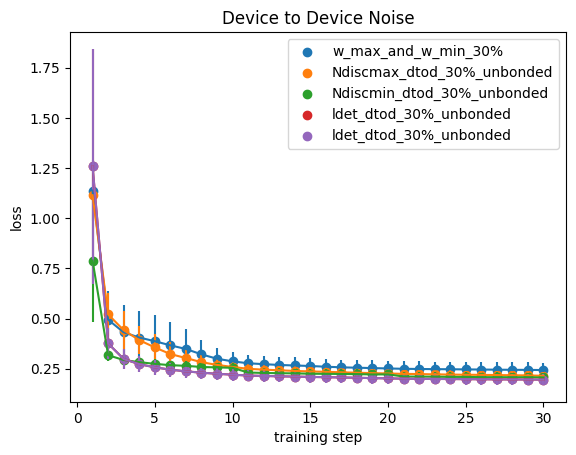

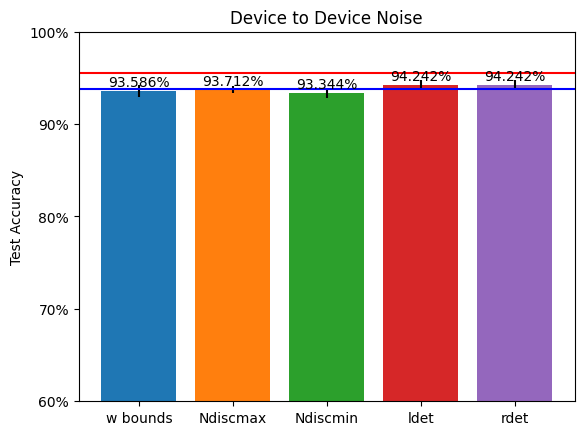

In [44]:
run_ids = []
run_ids.append(w_max_and_w_min_30_run_id)
run_ids.append(Ndiscmax_dtod_30_unbonded_run_id)
run_ids.append(Ndiscmin_dtod_30_unbonded_run_id)
run_ids.append(ldet_dtod_30_unbonded_run_id)
run_ids.append(rdet_dtod_30_unbonded_run_id)
plot_data_loss(data = runs, plot_run_ids = run_ids, title = 'Device to Device Noise')
plot_data_accuracy_with_bar(data = runs, plot_run_ids = run_ids, title = 'Device to Device Noise', Floating_Point_Accuracy = Floating_Point_Accuracy, noise_free_Accuracy = noise_free_Accuracy,
                            job_names=["w bounds", "Ndiscmax", "Ndiscmin", "ldet", "rdet"])

## Ndiscmax & Ndiscmin Cycle to Cycle Noise

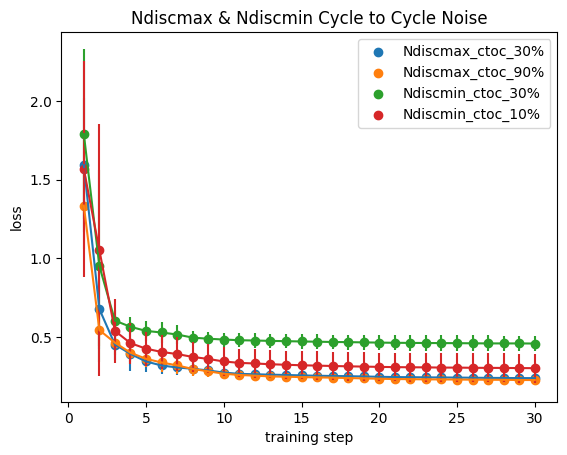

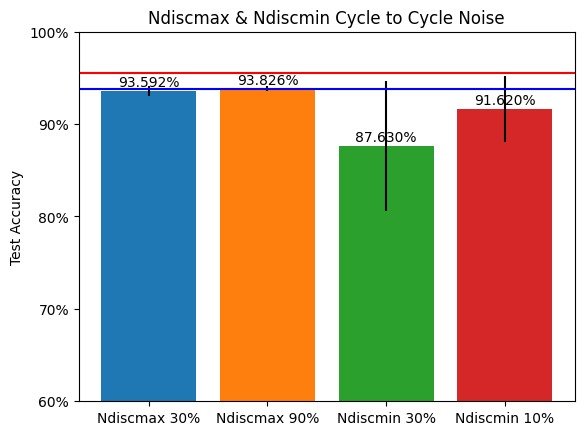

In [62]:
run_ids = []
run_ids.append(Ndiscmax_ctoc_30_run_id)
run_ids.append(Ndiscmax_ctoc_90_run_id)
run_ids.append(Ndiscmin_ctoc_30_run_id)
run_ids.append(Ndiscmin_ctoc_10_run_id)
plot_data_loss(data = runs, plot_run_ids = run_ids, title = 'Ndiscmax & Ndiscmin Cycle to Cycle Noise')
plot_data_accuracy_with_bar(data = runs, plot_run_ids = run_ids, title = 'Ndiscmax & Ndiscmin Cycle to Cycle Noise', Floating_Point_Accuracy = Floating_Point_Accuracy, noise_free_Accuracy = noise_free_Accuracy,
                            job_names=["Ndiscmax 30%", "Ndiscmax 90%", "Ndiscmin 30%", "Ndiscmin 10%"])

## ldet Cycle to Cycle Noise

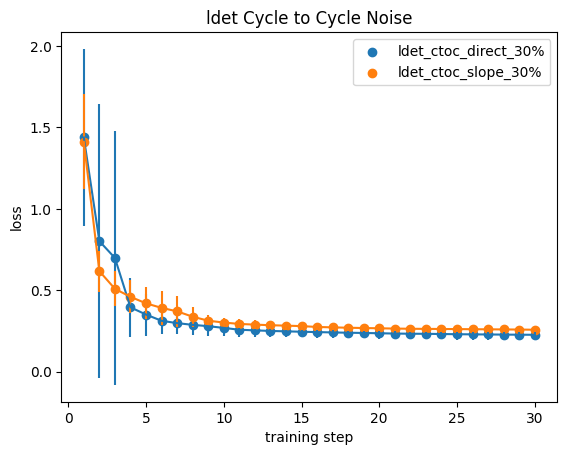

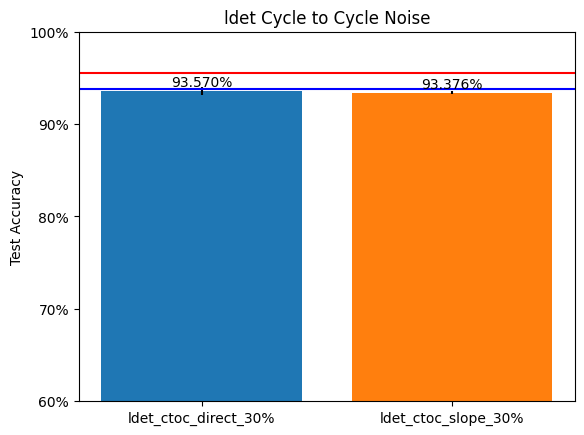

In [48]:
run_ids = []
run_ids.append(ldet_ctoc_direct_30_run_id)
run_ids.append(ldet_ctoc_slope_30_run_id)
plot_data_loss(data = runs, plot_run_ids = run_ids, title = 'ldet Cycle to Cycle Noise')
plot_data_accuracy_with_bar(data = runs, plot_run_ids = run_ids, title = 'ldet Cycle to Cycle Noise', Floating_Point_Accuracy = Floating_Point_Accuracy, noise_free_Accuracy = noise_free_Accuracy)

## rdet Cycle to Cycle Noise

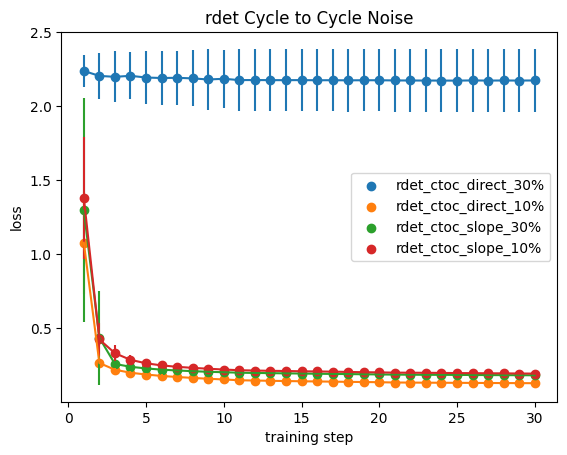

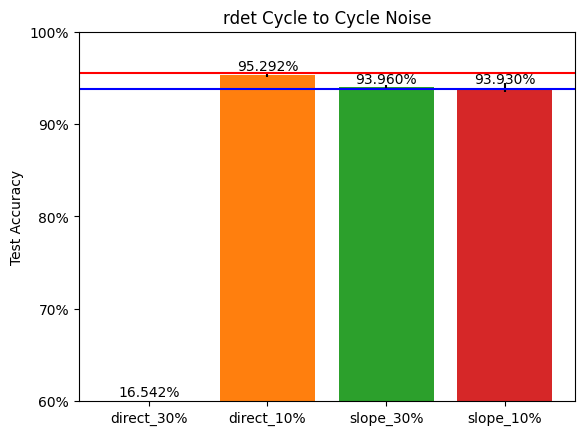

In [58]:
run_ids = []
run_ids.append(rdet_ctoc_direct_30_run_id)
run_ids.append(rdet_ctoc_direct_10_run_id)
run_ids.append(rdet_ctoc_slope_30_run_id)
run_ids.append(rdet_ctoc_slope_10_run_id)
plot_data_loss(data = runs, plot_run_ids = run_ids, title = 'rdet Cycle to Cycle Noise', legend_loc='right')
plot_data_accuracy_with_bar(data = runs, plot_run_ids = run_ids, title = 'rdet Cycle to Cycle Noise', Floating_Point_Accuracy = Floating_Point_Accuracy, noise_free_Accuracy = noise_free_Accuracy,
                            job_names=["direct_30%", "direct_10%", "slope_30%", "slope_10%"])

## Realistic Noise

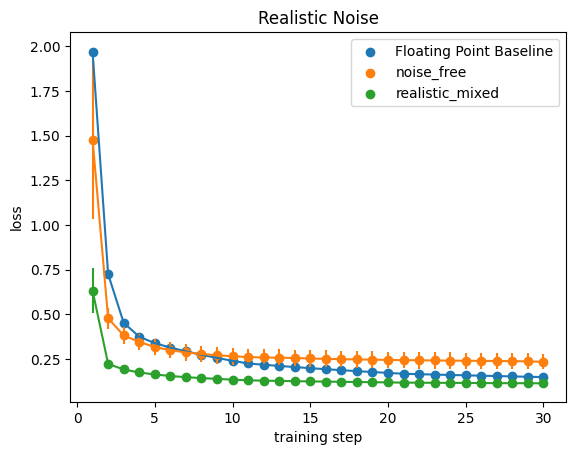

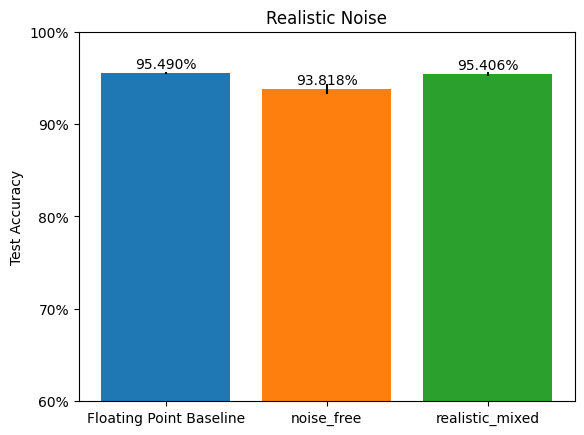

In [60]:
run_ids = []
run_ids.append(Floating_Point_Baseline_run_id)
run_ids.append(noise_free_run_id)
run_ids.append(realistic_mixed_run_id)
plot_data_loss(data = runs, plot_run_ids = run_ids, title = 'Realistic Noise')
plot_data_accuracy(data = runs, plot_run_ids = run_ids, title = 'Realistic Noise')